In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

import os

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
print(scipy.__version__)


1.14.1


In [3]:
DATA_DIR = os.path.join("..","data")
FIGURE_DIR = os.path.join("..","figures","Figure_6")
REVIEWER_DIR = os.path.join("..","..","reviewer_figs","SOHU")
metadata = pd.read_csv(os.path.join(DATA_DIR,"SOHU","distances","Column_mapping.csv"))# Get these from zenodo
distances = pd.read_csv(os.path.join(DATA_DIR,"SOHU","distances","distances.csv")) #Get these from zenodo

In [4]:
metadata

mapper = dict(zip(metadata['Sample ID'].values,metadata['Type'].values))
mapper_d = dict(zip(metadata['Sample ID'].values,metadata['Condition'].values))

In [7]:
MAIN_FIG_TRIAL = ["Single-type/Control Curve","Control Curve"]
SOHU_FIG_TRIAL = ["Sohu vs. Control"]
SINGLE_TYPE_TRIAL = ["Single-type/Control Curve"]
RBPMS_SOHU_TRIAL = ["SOHU vs. Control (Rbpms)"]
RBPMS_ONC_TRIAL = ["ONC vs. Control (Rbpms)"]

## Control curves

Results for comparing between control distibution curves


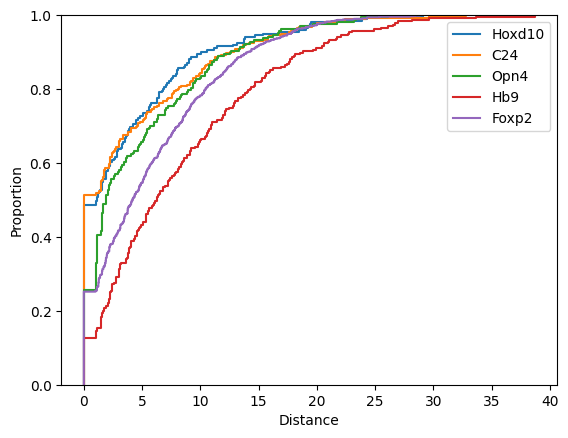

P-value from anderson_ksamp < 9.999000099990002e-05
[array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  1.04 ,  1.04 ,  1.163,  2.08 ,  2.08 ,
        2.6  ,  3.163,  3.288,  3.64 ,  4.192,  4.473,  4.794,  5.624,
        6.282,  6.779,  7.072,  7.57 ,  8.653, 10.528, 11.403, 13.123,
       13.844, 16.743, 19.238, 21.343, 24.265,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  1.248,  1.395,  1.591,  2.184,  3.757,  4.69 ,  5.624,
        6.424,  6.849,  7.276,  7.648,  7.941,  8.566,  8.998,  9.217,
       13.783, 19.457,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  

In [46]:
#Anderson darling
import itertools
rng = np.random.default_rng()
print("Results for comparing between control distibution curves")

trials = metadata[metadata['Trial'].isin(MAIN_FIG_TRIAL)]['Sample ID'].unique()
ctypes = ['Hoxd10','C24','Opn4','Hb9','Foxp2']
dist = distances.melt(var_name='Sample ID',value_name='Distance')

dist = dist[~pd.isna(dist['Distance']) & dist['Sample ID'].isin(trials)]
dist['Type'] = dist['Sample ID'].map(mapper)
    
data = []
for typ in ctypes:
    df = dist[dist['Type']==typ]
    data.append(df['Distance'].values)

    sns.ecdfplot(dist[dist['Type']==typ],x='Distance',label=typ)

plt.legend()
plt.show()
print("P-value from anderson_ksamp <", scipy.stats.anderson_ksamp(data,method=scipy.stats.PermutationMethod(n_resamples=10000, random_state=rng)).pvalue)

#Pairwise K-s test


unique_types = ctypes
output_pairs = []
output_p = []
for pair in itertools.combinations(unique_types,r=2):
    output_pairs.append(pair)
    typ1,typ2 = pair
    data = []
    for typ in [typ1,typ2]:
        data.append(dist[dist['Type']==typ]['Distance'].values)
    
    
    #output_p.append(scipy.stats.ks_2samp(data[0],data[1]).pvalue)
    print(data)
    output_p.append(scipy.stats.anderson_ksamp(data,method=scipy.stats.PermutationMethod(n_resamples=10000, random_state=rng)).pvalue)
    
output_p = scipy.stats.false_discovery_control(output_p)

print('(Type 1,Type2), p-value from pairwise K-S test after multiple testing correction')
for g in list(zip(output_pairs,output_p)):
    print(g)

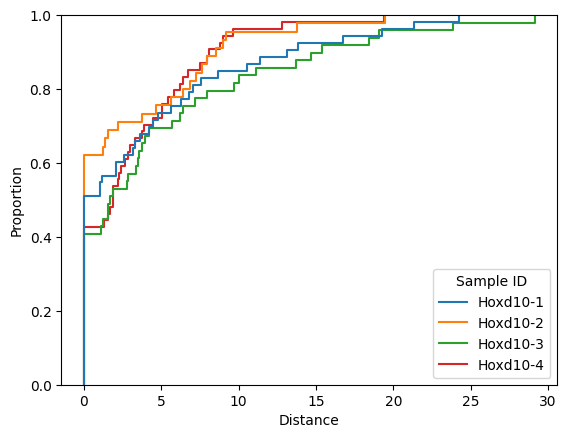

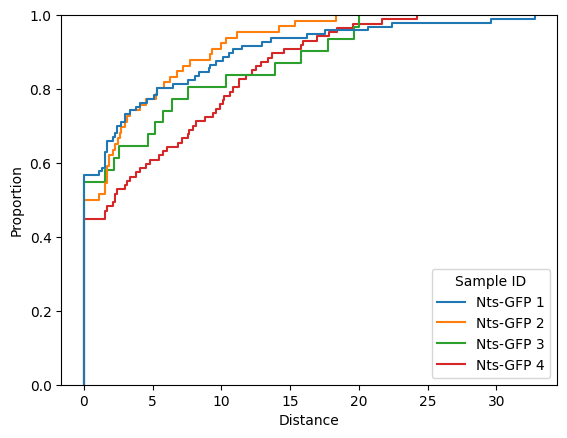

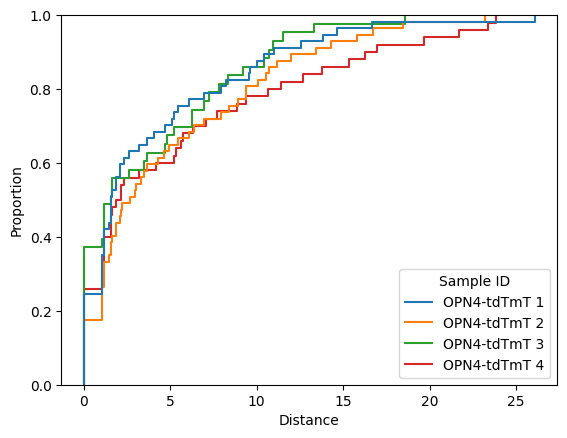

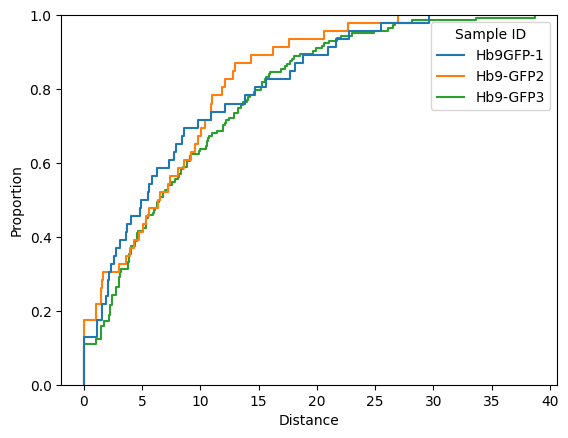

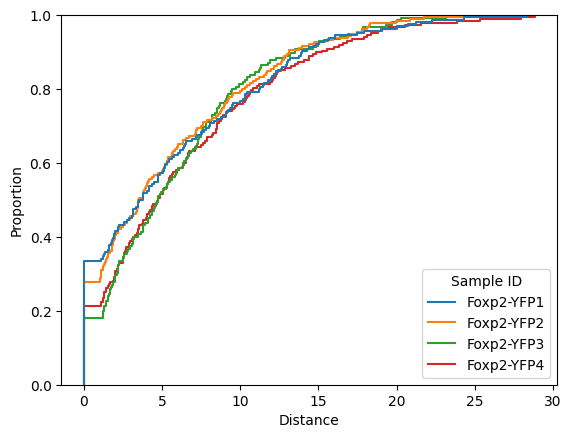

/Users/kushalnimkar/miniforge3/envs/Interview/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [47]:
#Anderson darling
import itertools

trials = metadata[metadata['Trial'].isin(MAIN_FIG_TRIAL)]['Sample ID'].unique()

dist = distances.melt(var_name='Sample ID',value_name='Distance')

dist = dist[~pd.isna(dist['Distance']) & dist['Sample ID'].isin(trials)]
dist['Type'] = dist['Sample ID'].map(mapper)

groups = []
for typ in ctypes:
    data = []
    df = dist[dist['Type']==typ]
    for samp_id in df['Sample ID'].unique():
        data.append(df[df['Sample ID']==samp_id]['Distance'].values)

    sns.ecdfplot(dist[dist['Type']==typ],x='Distance',label=typ,hue='Sample ID')
    plt.show()

    groups.append(((typ,typ),    scipy.stats.anderson_ksamp(data,method=scipy.stats.PermutationMethod(n_resamples=10000, random_state=rng)).pvalue))
groups.extend(list(zip(output_pairs,output_p)))


In [48]:
groups

[(('Hoxd10', 'Hoxd10'), np.float64(0.20277972202779723)),
 (('C24', 'C24'), np.float64(0.15098490150984903)),
 (('Opn4', 'Opn4'), np.float64(0.36576342365763426)),
 (('Hb9', 'Hb9'), np.float64(0.5747425257474252)),
 (('Foxp2', 'Foxp2'), np.float64(0.054894510548945105)),
 (('Hoxd10', 'C24'), np.float64(0.6272372762723728)),
 (('Hoxd10', 'Opn4'), np.float64(0.0004999500049995)),
 (('Hoxd10', 'Hb9'), np.float64(0.00014284285857128575)),
 (('Hoxd10', 'Foxp2'), np.float64(0.00014284285857128575)),
 (('C24', 'Opn4'), np.float64(0.00014284285857128575)),
 (('C24', 'Hb9'), np.float64(0.00014284285857128575)),
 (('C24', 'Foxp2'), np.float64(0.00014284285857128575)),
 (('Opn4', 'Hb9'), np.float64(0.00014284285857128575)),
 (('Opn4', 'Foxp2'), np.float64(0.0036663000366630003)),
 (('Hb9', 'Foxp2'), np.float64(0.00014284285857128575))]

In [49]:
ctype_to_idx = {v:k for k,v in dict(enumerate(ctypes)).items()}
data = np.zeros((len(ctype_to_idx),len(ctype_to_idx)))
annot = np.empty((len(ctype_to_idx),len(ctype_to_idx)),dtype='object')
for (t1,t2),p in groups:
    data[ctype_to_idx[t1],ctype_to_idx[t2]] = p
    data[ctype_to_idx[t2],ctype_to_idx[t1]] = p
    a = 'n.s.'
    if p < 0.0001:
        a = '****'
    elif 0.0001 <= p < 0.001:
        a = '***'
    elif 0.001 <= p < 0.01:
        a = '**'
    elif 0.01 <= p < 0.05:
        a = '*'

    
    annot[ctype_to_idx[t1],ctype_to_idx[t2]] = a
    annot[ctype_to_idx[t2],ctype_to_idx[t1]] = a

mask = np.triu(data,k=1)

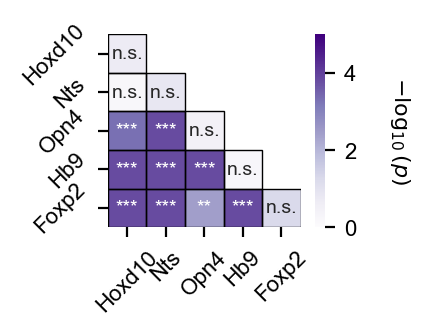

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
ctypes_r = [c if c!='C24' else 'Nts' for c in ctypes]

# Sample data
# np.random.seed(0)
# data = np.random.rand(6, 6)

# # Create a mask for upper triangle (excluding diagonal)
# mask = np.triu(np.ones_like(data, dtype=bool), k=1)

# Plot heatmap without lines
with plt.rc_context({'figure.dpi':200,'font.sans-serif':'Arial','font.size':8,'figure.figsize':(2.3,2.3*3/4)}):
    heatmap = sns.heatmap(
        -np.log10(data),
        mask=mask,
        cmap='Purples',
        annot=annot,
        fmt="",
        cbar=True,
        square=True,
        linewidths=0,  # No automatic borders
        vmin=0,
        vmax=5,
        annot_kws={'size':7},
        xticklabels=ctypes_r,
        yticklabels=ctypes_r,
    )

    # Manually draw borders only for lower triangle and diagonal
    n = data.shape[0]
    for i in range(n):
        for j in range(n):
            if i >= j:
                # Create a rectangle around each unmasked cell
                rect = patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', linewidth=0.5)
                plt.gca().add_patch(rect)

    colorbar = heatmap.collections[0].colorbar
    colorbar.set_label(r"$-\log_{10}(p)$", rotation=270, labelpad=20)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.savefig(os.path.join(FIGURE_DIR,"stats_sig.pdf"))
    plt.show()

## SOHU stats

['806P9OD', '806P4OD', '806O11OD', '806O11OS', '0818 Hoxd10GFP', ..., '805G', '806P10 OS', 'VZ200', 'T98-1', '552A']
Length: 42
Categories (42, object): ['0728 OPN4-tdTmt', '0804 OPN4-tdTmt', '0818 Hoxd10GFP', '537H5', ..., 'OPN4-tdTmT 10R', 'OPN4-tdTmT R1', 'T98-1', 'VZ200']
9.999000099990002e-05


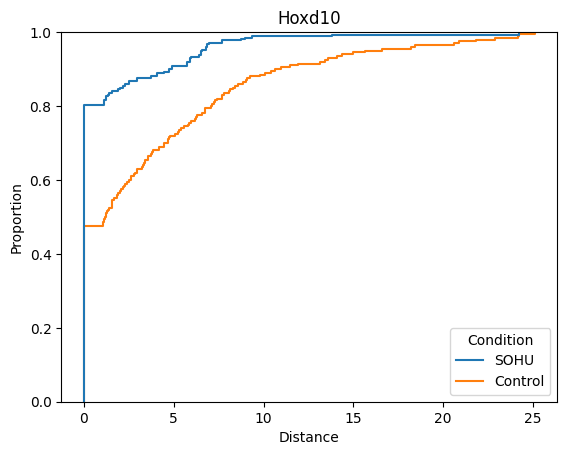

9.999000099990002e-05


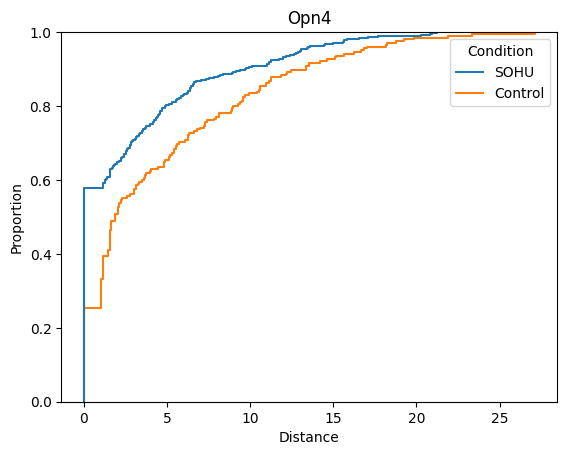

9.999000099990002e-05


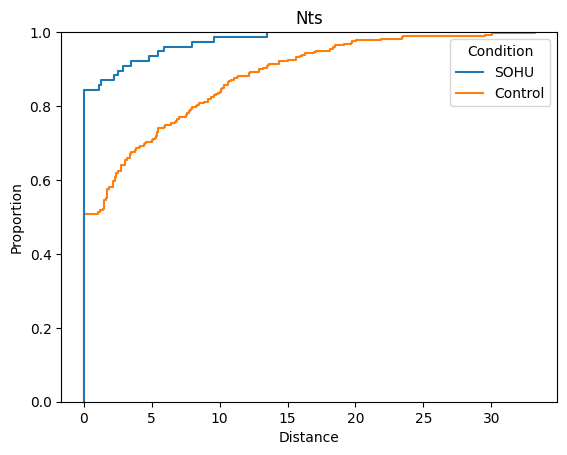

9.999000099990002e-05


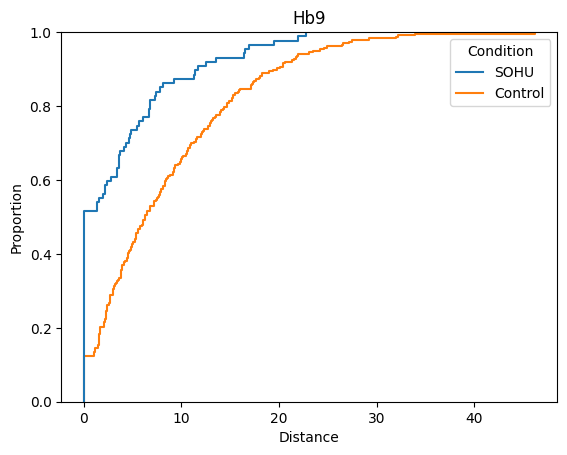

9.999000099990002e-05


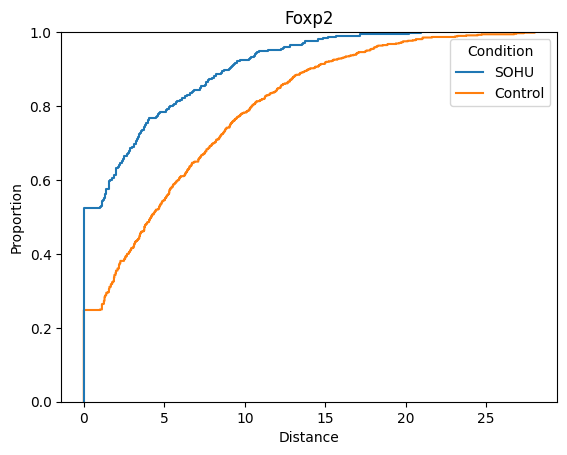

0.5793420657934206


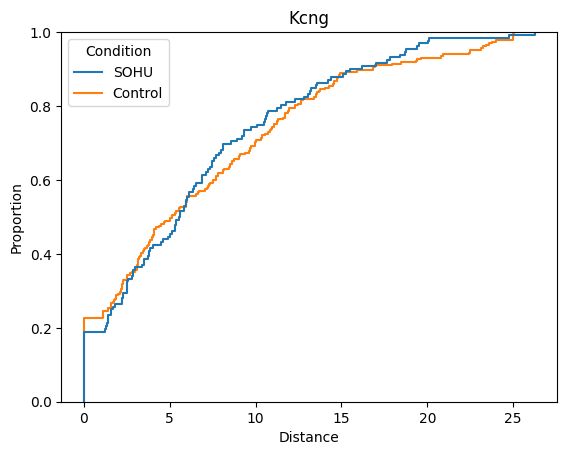

In [7]:
rng = np.random.default_rng()

trials = metadata[metadata['Trial'].isin(SOHU_FIG_TRIAL)]['Sample ID'].unique()

dist = distances.melt(var_name='Sample ID',value_name='Distance')

dist = dist[~pd.isna(dist['Distance']) & dist['Sample ID'].isin(trials)]
dist['Type'] = dist['Sample ID'].map(mapper)
dist['Condition'] = dist['Sample ID'].map(mapper_d)
dist['Sample ID'] = pd.Categorical(dist['Sample ID'])
print(dist['Sample ID'].unique())

for typ in dist['Type'].unique():
    df =  df = dist[(dist['Type']==typ)]
    sns.ecdfplot(df,x='Distance',hue='Condition')

    data = []
    for condition in ['SOHU','Control']:
        data.append(df[df['Condition']==condition]['Distance'].values)
    #print(scipy.stats.ks_2samp(data[0],data[1]))
    print(scipy.stats.anderson_ksamp(data,method=scipy.stats.PermutationMethod(n_resamples=10000, random_state=rng)).pvalue)

    plt.title(typ)
    plt.show()


## Rbpms SOHU and ONC

['KT478#2', 'KT478#8', '477-4', '477-1', '473-6', ..., '809F6r1', '820q4r4', '806O11R2', '806O11R1', '806O11R4']
Length: 12
Categories (12, object): ['472-3', '473-6', '477-1', '477-4', ..., '809F6r2', '820q4r4', 'KT478#2', 'KT478#8']
KstestResult(statistic=np.float64(0.3569309560103119), pvalue=np.float64(6.280838331185529e-39), statistic_location=np.float64(4.243), statistic_sign=np.int8(1))
Anderson_ksampResult(statistic=np.float64(120.60463091818814), critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=np.float64(9.999000099990002e-05))


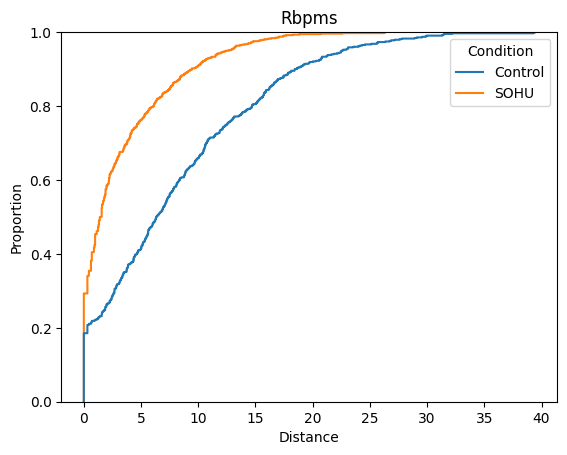

In [17]:
trials = metadata[metadata['Trial'].isin(RBPMS_SOHU_TRIAL)]['Sample ID'].unique()

dist = distances.melt(var_name='Sample ID',value_name='Distance')

dist = dist[~pd.isna(dist['Distance']) & dist['Sample ID'].isin(trials)]
dist['Type'] = dist['Sample ID'].map(mapper)
dist['Condition'] = dist['Sample ID'].map(mapper_d)
dist['Sample ID'] = pd.Categorical(dist['Sample ID'])
print(dist['Sample ID'].unique())

for typ in dist['Type'].unique():
    df =  df = dist[(dist['Type']==typ)]
    sns.ecdfplot(df,x='Distance',hue='Condition')

    data = []
    for condition in ['SOHU','Control']:
        data.append(df[df['Condition']==condition]['Distance'].values)
    print(scipy.stats.ks_2samp(data[0],data[1]))
    print(scipy.stats.anderson_ksamp(data,method=scipy.stats.PermutationMethod(n_resamples=10000, random_state=rng)))

    plt.title(typ)
    plt.show()


['473-6', '472-3', '478-2', '477-2', '748k', '798h4', '0709PZ2', '798h3']
Categories (8, object): ['0709PZ2', '472-3', '473-6', '477-2', '478-2', '748k', '798h3', '798h4']
1
2
KstestResult(statistic=np.float64(0.12392558531691818), pvalue=np.float64(0.00012883584490313245), statistic_location=np.float64(6.842), statistic_sign=np.int8(1))
Anderson_ksampResult(statistic=np.float64(11.4083964356275), critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=np.float64(0.00019998000199980003))


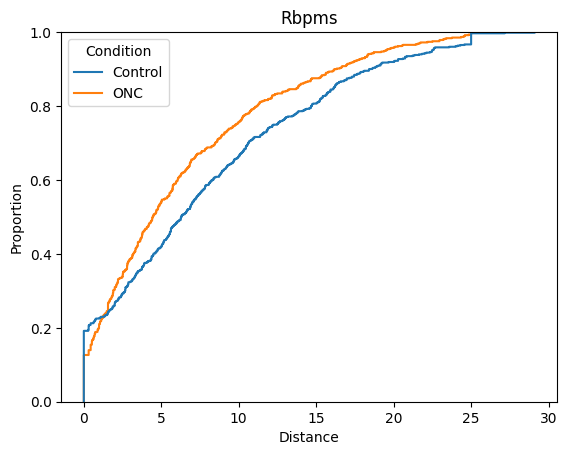

In [23]:
trials = metadata[metadata['Trial'].isin(RBPMS_ONC_TRIAL)]['Sample ID'].unique()

dist = distances.melt(var_name='Sample ID',value_name='Distance')

dist = dist[~pd.isna(dist['Distance']) & dist['Sample ID'].isin(trials)]
dist['Type'] = dist['Sample ID'].map(mapper)
dist['Condition'] = dist['Sample ID'].map(mapper_d)
dist['Sample ID'] = pd.Categorical(dist['Sample ID'])
print(dist['Sample ID'].unique())

for typ in dist['Type'].unique():
    df =  df = dist[(dist['Type']==typ)]
    sns.ecdfplot(df,x='Distance',hue='Condition')

    data = []
    for condition in ['ONC','Control']:
        data.append(df[df['Condition']==condition]['Distance'].values)
        print(len(data))
    print(scipy.stats.ks_2samp(data[0],data[1]))
    print(scipy.stats.anderson_ksamp(data,method=scipy.stats.PermutationMethod(n_resamples=10000, random_state=rng)))

    plt.title(typ)
    plt.show()


## C10 vs Hoxd10 vs. C24


Anderson_ksampResult(statistic=np.float64(1.5758260846487528), critical_values=array([0.44925884, 1.3052767 , 1.9434184 , 2.57696569, 3.41634856,
       4.07210043, 5.56419101]), pvalue=0.0740413484386946)


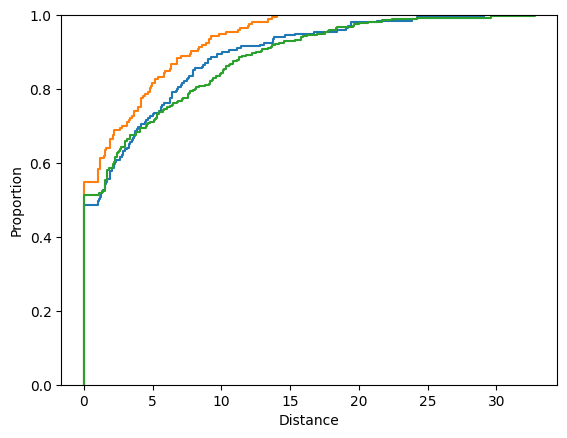

In [39]:
#Anderson darling
import itertools

trials = metadata[metadata['Trial'].isin(SINGLE_TYPE_TRIAL)]['Sample ID'].unique()

dist = distances.melt(var_name='Sample ID',value_name='Distance')

dist = dist[~pd.isna(dist['Distance']) & dist['Sample ID'].isin(trials)]
dist['Type'] = dist['Sample ID'].map(mapper)


data = []
for typ in dist['Type'].unique():
    df = dist[dist['Type']==typ]
    data.append(df['Distance'].values)
    sns.ecdfplot(dist[dist['Type']==typ],x='Distance',label=typ)

print(scipy.stats.anderson_ksamp(data))

#pairwise KS
unique_types = dist['Type'].unique()
output_pairs = []
output_p = []
for pair in itertools.combinations(unique_types,r=2):
    output_pairs.append(pair)
    typ1,typ2 = pair
    data = []
    for typ in [typ1,typ2]:
        data.append(dist[dist['Type']==typ]['Distance'].values)
    
    
    #output_p.append(scipy.stats.ks_2samp(data[0],data[1]).pvalue)
    output_p.append(scipy.stats.anderson_ksamp(data,method=scipy.stats.PermutationMethod(n_resamples=10000, random_state=rng)).pvalue)
    
output_p = scipy.stats.false_discovery_control(output_p)

groups = list(zip(output_pairs,output_p))

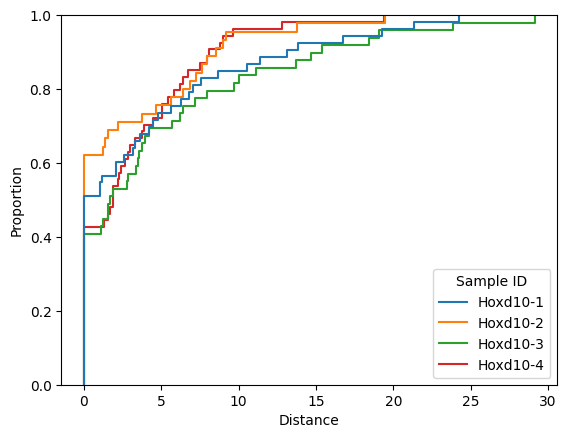

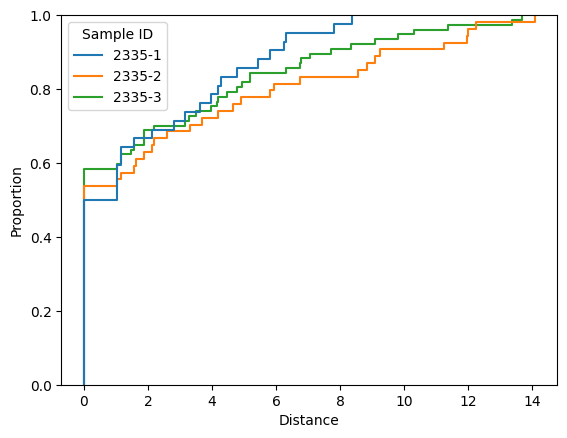

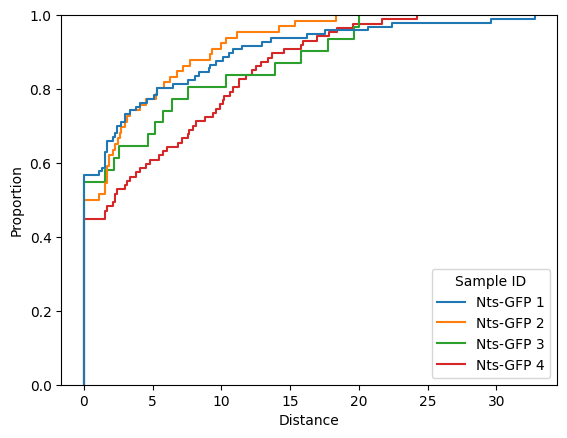

In [40]:
#Anderson darling
import itertools

ctypes = ['Hoxd10','C10','C24']
trials = metadata[metadata['Trial'].isin(MAIN_FIG_TRIAL)]['Sample ID'].unique()

dist = distances.melt(var_name='Sample ID',value_name='Distance')

dist = dist[~pd.isna(dist['Distance']) & dist['Sample ID'].isin(trials)]
dist['Type'] = dist['Sample ID'].map(mapper)

for typ in ctypes:
    data = []
    df = dist[dist['Type']==typ]
    for samp_id in df['Sample ID'].unique():
        data.append(df[df['Sample ID']== samp_id]['Distance'].values)

    sns.ecdfplot(dist[dist['Type']==typ],x='Distance',label=typ,hue='Sample ID')
    plt.show()

    #groups.append(((typ,typ), scipy.stats.anderson_ksamp(data).pvalue))
    groups.append(((typ,typ),scipy.stats.anderson_ksamp(data,method=scipy.stats.PermutationMethod(n_resamples=10000, random_state=rng)).pvalue))

#Pairwise K-s test

In [41]:
ctype_to_idx = {v:k for k,v in dict(enumerate(ctypes)).items()}
data = np.zeros((len(ctype_to_idx),len(ctype_to_idx)))
annot = np.empty((len(ctype_to_idx),len(ctype_to_idx)),dtype='object')
for (t1,t2),p in groups:
    data[ctype_to_idx[t1],ctype_to_idx[t2]] = p
    data[ctype_to_idx[t2],ctype_to_idx[t1]] = p
    a = 'n.s.'
    if p < 0.0001:
        a = '****'
    elif 0.0001 <= p < 0.001:
        a = '***'
    elif 0.001 <= p < 0.01:
        a = '**'
    elif 0.01 <= p < 0.05:
        a = '*'

    
    annot[ctype_to_idx[t1],ctype_to_idx[t2]] = a
    annot[ctype_to_idx[t2],ctype_to_idx[t1]] = a

mask = np.triu(data,k=1)

In [42]:
groups

[(('Hoxd10', 'C10'), np.float64(0.13708629137086292)),
 (('Hoxd10', 'C24'), np.float64(0.6097390260973903)),
 (('C10', 'C24'), np.float64(0.13708629137086292)),
 (('Hoxd10', 'Hoxd10'), np.float64(0.19658034196580343)),
 (('C10', 'C10'), np.float64(0.619038096190381)),
 (('C24', 'C24'), np.float64(0.15808419158084192))]

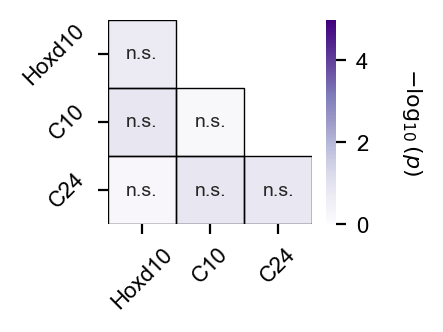

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
ctypes_r = ctypes

# Sample data
# np.random.seed(0)
# data = np.random.rand(6, 6)

# # Create a mask for upper triangle (excluding diagonal)
# mask = np.triu(np.ones_like(data, dtype=bool), k=1)

# Plot heatmap without lines
with plt.rc_context({'figure.dpi':200,'font.sans-serif':'Arial','font.size':8,'figure.figsize':(2,2*3/4)}):
    heatmap = sns.heatmap(
        -np.log10(data),
        mask=mask,
        cmap='Purples',
        annot=annot,
        fmt="",
        cbar=True,
        square=True,
        linewidths=0,  # No automatic borders
        vmin=0,
        vmax=5,
        annot_kws={'size':7},
        xticklabels=ctypes_r,
        yticklabels=ctypes_r,
    )

    # Manually draw borders only for lower triangle and diagonal
    n = data.shape[0]
    for i in range(n):
        for j in range(n):
            if i >= j:
                # Create a rectangle around each unmasked cell
                rect = patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', linewidth=0.5)
                plt.gca().add_patch(rect)

    colorbar = heatmap.collections[0].colorbar
    colorbar.set_label(r"$-\log_{10}(p)$", rotation=270, labelpad=20)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.savefig(os.path.join(REVIEWER_DIR,"stats_sig.pdf"))
    plt.show()

## Test within ONC/SOHU

In [ ]:
#Anderson darling
import itertools

trials = metadata[metadata['Trial'].isin(RBPMS_ONC_TRIAL)]['Sample ID'].unique()

dist = distances.melt(var_name='Sample ID',value_name='Distance')

dist = dist[~pd.isna(dist['Distance']) & dist['Sample ID'].isin(trials)]
dist['Type'] = dist['Sample ID'].map(mapper)
    
for typ in dist['Type'].unique():
    data = []
    df = dist[dist['Type']==typ]
    for samp_id in df['Sample ID'].unique():
        data.append(df['Distance'].values)

    for uid in dist[dist['Type']==typ]['Sample ID'].unique():
        condition = mapper_d[uid]
        sns.ecdfplot(dist[(dist['Type']==typ) & (dist['Sample ID']==uid)],x='Distance',label=typ,color='Orange' if condition == 'ONC' else 'Blue')

    plt.show()

    scipy.stats.anderson_ksamp(data)

#Pairwise K-s test

In [ ]:
#Anderson darling
import itertools

trials = metadata[metadata['Trial'].isin(RBPMS_SOHU_TRIAL)]['Sample ID'].unique()

dist = distances.melt(var_name='Sample ID',value_name='Distance')

dist = dist[~pd.isna(dist['Distance']) & dist['Sample ID'].isin(trials)]
dist['Type'] = dist['Sample ID'].map(mapper)
    
for typ in dist['Type'].unique():
    data = []
    df = dist[dist['Type']==typ]
    for samp_id in df['Sample ID'].unique():
        data.append(df['Distance'].values)

    for uid in dist[dist['Type']==typ]['Sample ID'].unique():
        condition = mapper_d[uid]
        sns.ecdfplot(dist[(dist['Type']==typ) & (dist['Sample ID']==uid)],x='Distance',label=typ,color='Orange' if condition == 'SOHU' else 'Blue')

    plt.show()

    scipy.stats.anderson_ksamp(data)

#Pairwise K-s test